# Programación para *Data Science*

Unidad 7: Análisis de datos en Python
------------------------------------------------------



---
## Ejercicios y preguntas teóricas para la PEC

A continuación, los ejercicios que se deben completar en esta PEC y que forman parte de la evaluación de esta unidad.

## Pregunta 1

Investiga y describe el funcionamiento del método de cross-validation *Leave One Out*. Pon un ejemplo de aplicación del algoritmo para resolver un problema de análisis en el ámbito de la salud. Recordad que hay que citar las referencias consultadas para responder la pregunta, y que la respuesta que proporcionéis debe ser original (redactada por vosotros mismos, después de haber leído y entendido las referencias que consideréis oportunas). **(1 punto)** <span style="font-family: Courier New; background-color: #ffcc5c; color: #000000; padding: 3px; ">EG</span>

#### Respuesta

La validación cruzada Leave-one-out es esencialmente una estimación del rendimiento de generalización de un modelo entrenado en 𝑛 − 1 muestras de datos, que generalmente es una estimación ligeramente pesimista del rendimiento de un modelo entrenado en 𝑛 muestras. Es mejor pensar en la validación cruzada como una forma de estimar el rendimiento de generalización de los modelos generados por un procedimiento particular, en lugar del modelo en sí. Por ejemplo, imaginemos que estamos creando un modelo predictivo del tipo del tipo de melanoma (alto o bajo riesgo) y tenemos una muestra relativamente pequeña (1000 observaciones) que incluyen 3 parámetros descriptivos del melanoma y su nivel de riesgo (alto o bajo). Podemos ajustar el modelo usando 999 de las 1000 observaciones para después evaluar su rendimiento dada la observación que hemos dejado fuera del set de entrenamiento. En este caso, podemos repetir este método hasta 999 veces, para estimar un redimiento medio del modelo.

## Pregunta 2

Debemos evitar evaluar los modelos con los mismos datos que se han utilizado para el aprendizaje. De no hacerlo, podríamos favorecer el problema del **sobre-ajuste**. ¿En qué consiste este problema y qué consecuencias puede tener? **(0,5 puntos)** <span style="font-family: Courier New; background-color: #f2ae72; color: #000000; padding: 3px; ">EI</span>

#### Respuesta

El exceso de ajuste de un modelo es un error de modelado que se produce cuando una función se ajusta demasiado a un conjunto limitado de puntos de datos. Por tanto, sólo supone un problema en los modelos de aprendizaje supervisado. Una de las consecuencias del sobre-ajuste es que el modelo toma una forma demasiado compleja para explicar la idiosincrasia a los datos objeto de estudio y dificilmente generaliza a nuevas muestras de datos. La **generalización** es un término utilizado para describir la capacidad del modelo de reaccionar ante los nuevos datos. Es decir, después de ser entrenado en un entrenamiento, un modelo puede digerir datos nuevos y hacer predicciones precisas. La capacidad del modelo para generalizarse es esencial para el éxito de un modelo. Si un modelo se ha formado demasiado bien sobre datos de formación, no podrá generalizarse. Hará predicciones inexactas cuando se den nuevos datos, y hará que el modelo sea inútil aunque sea capaz de hacer predicciones precisas para los datos de formación. De eso se llama sobre-ajuste (*overfitting*).

Uno de los métodos más utilizados para evaluar el problema del sobre-ajuste llama **cross-validation**. Es un modelo de validación de modelos para evaluar cómo se generalizan los resultados del análisis estadístico (modelo) a un conjunto de datos independiente. Se utiliza principalmente en los parámetros donde el objetivo es la predicción y se quiere estimar con exactitud como comportará un modelo predictivo a la práctica. En cuanto hacemos cross-validación, destinaremos una parte de los datos a hacer el entrenamiento del modelo y la otra parte la reservaremos para evaluar el rendimiento del modelo aprendido.


## Ejercicio 1

En los siguientes ejercicios de la PEC usaremos el conjunto de datos del dataset `breast_cancer` de *sklearn*. Crea una tabla con los estadísticos descriptivos de todas las características de los tumores de la base de datos `breast_cancer` agrupados por tipo (benigno/maligno).

Realizad un test estadístico [ttest](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) para comparar el error de la simetría (*symmetry error*) y tersura (*mean smoothness*) de los tumores benignos con las de los malignos. Dado el resultado obtenido, indica qué características podrían ser más relevantes para diagnosticar un tumor maligno.

Nota: Consulta este [enlace](http://www.conexionismo.com/leer_articulo.php?ref=prueba_t_de_student_para_la_comparacion_de_dos_muestras_independientes-j960497l) si quieres ampliar conocimientos sobre el test estadístico ttest. Para realizar el test estadístico automáticamente podéis utilizar el método [`ttest_ind`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) de *Scipy.stats*
**(1 punto)** <span style="font-family: Courier New; background-color: #ffcc5c; color: #000000; padding: 3px; ">EG</span>


In [1]:
# Respuesta

# Importamos las librerías
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import datasets 
import scipy.stats as stats

# Importamos el dataset
diagnostics = datasets.load_breast_cancer()

# Los transformamos en un dataframe
diagnostics_df = pd.DataFrame(diagnostics.data)

# Nombramos las columnas de las variables
diagnostics_df.columns = diagnostics['feature_names']

# Añadimos la columna Type con el resultado del diagnóstico (benigno/maligno)
diagnostics_df['Type'] = diagnostics.target

# Mostramos pos pantalla los parámetros descriptivos de la muestra 
diagnostics_df.groupby('Type').describe()

mean radius                                                             \
           count       mean       std     min     25%     50%    75%    max   
Type                                                                          
0          212.0  17.462830  3.203971  10.950  15.075  17.325  19.59  28.11   
1          357.0  12.146524  1.780512   6.981  11.080  12.200  13.37  17.85   

     mean texture             ... worst symmetry          \
            count       mean  ...            75%     max   
Type                          ...                          
0           212.0  21.604906  ...       0.359225  0.6638   
1           357.0  17.914762  ...       0.298300  0.4228   

     worst fractal dimension                                                  \
                       count      mean       std      min       25%      50%   
Type                                                                           
0                      212.0  0.091530  0.021553  0.05504  0.076302  0.08760   
1                      357.0  0.079442  0.013804  0.05521  0.070090  0.07712   

                        
           75%     max  
Type                    
0     0.102625  0.2075  
1     0.085410  0.1486  

[2 rows x 240 columns]

In [2]:
# Realizamos un test estadístico para cada variable comparando los tumores benignos (tipo 0) y malignos (tipo 1).
# Ejecutamos un prueba t de student para muestras independientes ya que cada registro corresponde con un paciente diferente.
t1, p1 = stats.ttest_ind(diagnostics_df.query("Type==0")['mean smoothness'],diagnostics_df.query("Type==1")['mean smoothness'])
print("Análisis de la tersura. Estadístico t= " + str(t1) + ", p-val = " + str(p1) )
t2, p2 = stats.ttest_ind(diagnostics_df.query("Type==0")['symmetry error'],diagnostics_df.query("Type==1")['symmetry error'])
print("Análisis del error de la simetría. Estadístico t= " + str(t2) + ", p-val = " + str(p2) )

Análisis de la tersura. Estadístico t= 9.146098808149038, p-val = 1.0518503592032013e-18
Análisis del error de la simetría. Estadístico t= -0.1552978000059369, p-val = 0.8766418183858812


#### Respuesta
Preferiremos la variable tersura como diferenciadora de los tumores benignos y malignos dado que el test sugiere que ambas muestras de lisura comparadas provienen de poblaciones diferentes.

## Ejercicio 2

Representar mediante [boxplots] (https://en.wikipedia.org/wiki/Boxplots) como varían la textura, el area, la concavidad y la simetría de los tumores según el tipo (*maligna / benigna*). Recuerda ajustar los parámetros de la visualización para facilitar la lectura e interpretación de la gráfica que generen. **(2 puntos)** <span style="font-family: Courier New; background-color: #82b74b; color: #000000; padding: 3px; ">NM</span>

Nota: Crea un dataframe con los datos de `diagnostics.data` i `diagnostics.target` para dibujar los boxplots.

In [8]:
# Importamos las librerías

import numpy as np 
import pandas as pd 
import seaborn as sns  # librería opcional
import matplotlib.pyplot as plt 
from sklearn import datasets 

# Importamos el dataset
diagnostics = datasets.load_breast_cancer()

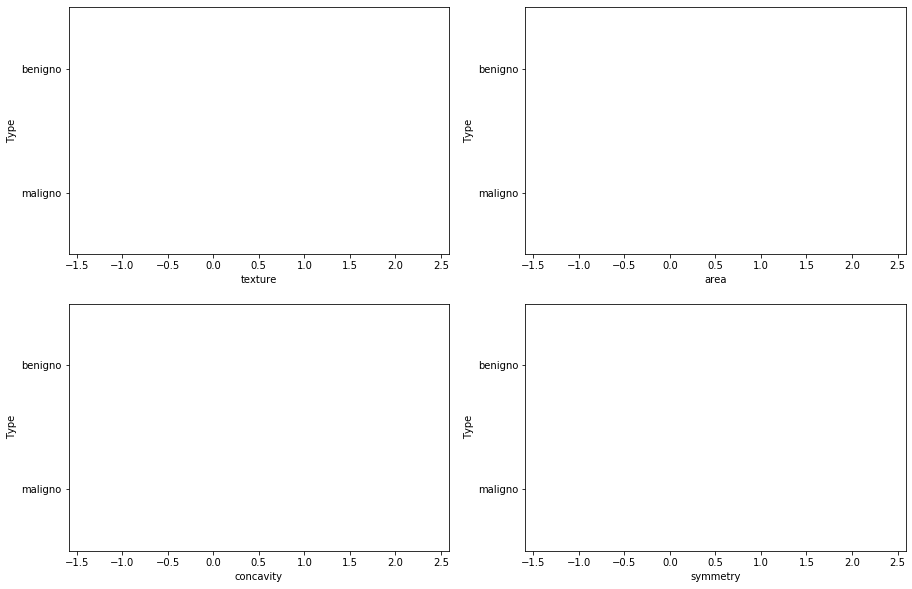

In [9]:
## Respuesta
diagnostics_df = pd.DataFrame(diagnostics.data)

# Asignamos una categoría a cada tumor
diagnostics_df.columns = diagnostics['feature_names']
diagnostics_df['Type'] = diagnostics.target
diagnostics_df.loc[(diagnostics_df.Type == 0),"Type"] = diagnostics.target_names[0]
diagnostics_df.loc[(diagnostics_df.Type == 1),"Type"] = diagnostics.target_names[1]

# Definimos parámetros de la figura
label=['maligno','benigno']
pos=[1,2]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Dibujamos cada uno de los gráficos
vplot1=axes[0,0].boxplot([np.array(diagnostics_df['mean texture'][diagnostics_df.Type == 'malignant']),
                           np.array(diagnostics_df['mean texture'][diagnostics_df.Type == 'benign'],
                                   )],vert=False)
axes[0,0].set_xlabel('texture')
axes[0,0].set_ylabel('Type')
axes[0,0].set_yticks(pos)
axes[0,0].set_yticklabels(label)

vplot2=axes[0,1].boxplot([np.array(diagnostics_df['mean area'][diagnostics_df.Type == 'malignant']),
                           np.array(diagnostics_df['mean area'][diagnostics_df.Type == 'benign'],
                                   )],vert=False)
axes[0,1].set_xlabel('area')
axes[0,1].set_ylabel('Type')
axes[0,1].set_yticks(pos)
axes[0,1].set_yticklabels(label)

vplot3=axes[1,0].boxplot([np.array(diagnostics_df['mean concavity'][diagnostics_df.Type == 'malignant']),
                           np.array(diagnostics_df['mean concavity'][diagnostics_df.Type == 'benign'],
                                   )],vert=False)
axes[1,0].set_xlabel('concavity')
axes[1,0].set_ylabel('Type')
axes[1,0].set_yticks(pos)
axes[1,0].set_yticklabels(label)

vplot4=axes[1,1].boxplot([np.array(diagnostics_df['mean symmetry'][diagnostics_df.Type == 'malignant']),
                           np.array(diagnostics_df['mean symmetry'][diagnostics_df.Type == 'benign'],
                                   )],vert=False)
axes[1,1].set_xlabel('symmetry')
axes[1,1].set_ylabel('Type')
axes[1,1].set_yticks(pos)
axes[1,1].set_yticklabels(label)
colors = ['forestgreen', 'darkorange']


# Assignem color a cada un dels cossos del boxplot
plt.show()

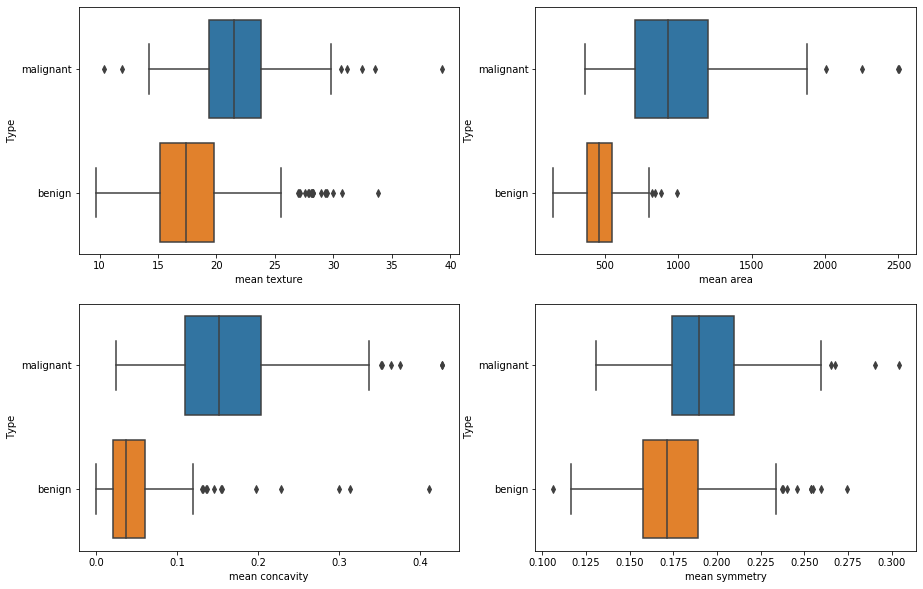

In [6]:
#Opción 2: Otra forma de realizar el ejercicio es mediante la librería
# Seaborn, que veremos en la próxima unidad

# Importamos las librerías
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import datasets

# Importamos el dataset
diagnostics = datasets.load_breast_cancer()
diagnostics_df = pd.DataFrame(diagnostics.data)

# Asignamos una categoría a cada tumor
diagnostics_df.columns = diagnostics['feature_names']
diagnostics_df['Type'] = diagnostics.target
diagnostics_df.loc[(diagnostics_df.Type == 0),"Type"] = diagnostics.target_names[0]
diagnostics_df.loc[(diagnostics_df.Type == 1),"Type"] = diagnostics.target_names[1]

# Dibujamos cada una de las gráficas
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x=diagnostics_df['mean texture'],y=diagnostics_df.Type)
plt.subplot(2,2,2)
sns.boxplot(x=diagnostics_df['mean area'],y=diagnostics_df.Type)
plt.subplot(2,2,3)
sns.boxplot(x=diagnostics_df['mean concavity'],y=diagnostics_df.Type)
plt.subplot(2,2,4)
sns.boxplot(x=diagnostics_df['mean symmetry'],y=diagnostics_df.Type)

## Ejercicio 3

Ahora aplica un Principal Component Analysis para reducir el número de variables predictivas de los tipos de tumor. <span style="font-family: Courier New; background-color: #82b74b; color: #000000; padding: 3px; ">NM</span>

a) ¿Qué porción de la variabilidad total la explica el primer componente? **(1.5 puntos)**

b) Representa en un diagrama de barras qué porción de la variabilidad total explica cada uno de los tres primeros componentes. **(0.5 puntos)**

El primer componente explica 98.2% de la variabilidad total de la muestra.


Text(0, 0.5, 'Porción de la variabilidad explicada')

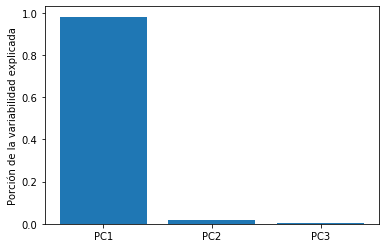

In [7]:
## Respuesta

import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition

X = diagnostics_df.loc[:, diagnostics_df.columns != 'Type'].values

# a)
# Aplicamos el PCA
pca = decomposition.PCA(n_components=3)
pca.fit(X)

# Análisis de la dispersión de la muestra
print('El primer componente explica ' + str(np.around(pca.explained_variance_ratio_[0],3)*100) 
      + '% de la variabilidad total de la muestra.')

# b)
# Representación del diagrama de barras
plt.bar( range(3), pca.explained_variance_ratio_)
plt.xticks( range(3), ['PC1','PC2','PC3'])
plt.ylabel('Porción de la variabilidad explicada')

### Respuesta (Opción 2)
En cuanto una (o más) de las variables tienen una magnitud significativamente diferente que el resto, el PCA podría exagerar la contribución de los ejes influenciados por variables con mayor magnitud y rango de variación, ya que el PCA se calcula a partir de la suma de los cuadrados de [la descomposición en valores singulares] (https://ca.wikipedia.org/wiki/Descomposici%C3%B3_en_valors_singulars). La diferencia de magnitudes puede ser simplemente debida a una desafortunada elección de unidad de medida (si se trata de datos físicos, por ejemplo, kilómetros vs metros), pero en realidad las diferentes variables podrían tener dimensiones totalmente diferentes (por ejemplo, peso vs volumen), como es el caso en este ejercicio. En estos casos, lo más correcto es escalar las variables previamente a la realización del PCA. A pesar de que no se pedía al ejercicio, mostramos aquí el método y su efecto en los resultados:

El primer componente explica 44.3% de la variabilidad total de la muestra.


Text(0, 0.5, 'Porción de la variabilidad explicada')

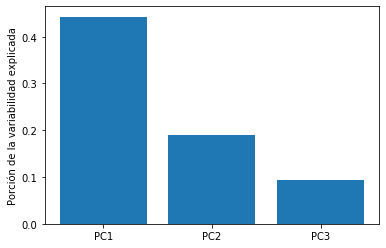

In [8]:
## Respuesta Opción 2 (usando Pipeline y StandardScaler para escalar la muestra):

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# a) Escalamos la muestra y aplicamos el PCA
std_clf = make_pipeline(StandardScaler(), decomposition.PCA(n_components=3))
std_clf.fit_transform(X)
pca_std = std_clf.named_steps['pca']
scaler = std_clf.named_steps['standardscaler']
X_std_transformed = pca_std.transform(scaler.transform(X))

# Análisis de la dispersión de la muestra
print('El primer componente explica ' + str(np.around(pca_std.explained_variance_ratio_[0],3)*100) 
      + '% de la variabilidad total de la muestra.')

# b)
# Representación del diagrama de barras
plt.bar( range(3), pca_std.explained_variance_ratio_)
plt.xticks( range(3), ['PC1','PC2','PC3'])
plt.ylabel('Porción de la variabilidad explicada')

## Ejercicio 4

El objetivo de un modelo de **regresión lineal** es encontrar una relación entre una o más características (variables independientes) y una variable objetivo continua (variable dependiente). Cuando sólo usamos una característica predictiva se le llama **Regresión Lineal Univariada** y si hay múltiples predictores se llama **Regresión Lineal Múltiple**.

Cuando la variable dependiente es una variable binaria que contiene datos codificados como 1 (sí, éxito, etc.) o 0 (no, fallo, etc.), como es el caso del dataset `breast_cancer`, tendremos que emplear una [regresión logística](https://ca.wikipedia.org/wiki/Regressi%C3%B3_log%C3%ADstica).

Crea un modelo de regresión logística que estime la probabilidad de que un tumor sea maligno dada su área y su textura. Muestra la [matriz de confusión](https://ca.wikipedia.org/wiki/Matriu_de_confusi%C3%B3) del modelo obtenido.

Nota: Quizás te interesa explorar la función [sklearn.metrics.confusion_matrix()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) **(1,5 puntos)** <span style="font-family: Courier New; background-color: #f2ae72; color: #000000; padding: 3px; ">EI</span>

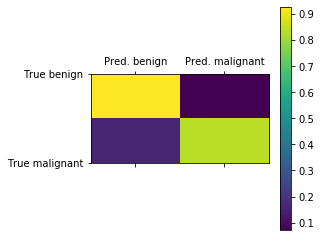

In [9]:
# Respuesta
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = diagnostics_df[['mean texture','mean area']]
y = diagnostics_df['Type']

# Dividimos los datos en datos de entrenamiento (60%) y de test (40%) mediante la función train_test_split
train,test = train_test_split(diagnostics_df, test_size=0.4)
train_X = train[['mean texture','mean area']]
train_y = train['Type']
test_X = test[['mean texture','mean area']]
test_y = test['Type']

# Aplicamos la regresión
clf = LogisticRegression(random_state=0, solver='lbfgs').fit(train_X, train_y)
clf.score(test_X,test_y)

# Predecimos el tipo de cáncer dados los predictores Textura y Área
predicted = clf.predict( diagnostics_df[['mean texture','mean area']].values )
real      = diagnostics_df['Type'].values

# Representamos la matriz de confusión
import matplotlib.pyplot as plt 
result_cofusion_mat = []
for real_c in ['benign','malignant']:
    tmp = []
    for pred_c in ['benign','malignant']:
        # Dividim per el nombre total de casos per calcular al proporcio de: 
        # vertaders positius, vertaders negatius, falsos positius, i falsos negatius
        tmp.append( np.where(np.logical_and(predicted==pred_c, real==real_c))[0].size /np.where(real==real_c)[0].size)
    result_cofusion_mat.append(tmp)

plt.matshow(result_cofusion_mat)
plt.xticks( [0,1], ['Pred. benign','Pred. malignant'] )
plt.yticks( [0,1], ['True benign','True malignant'] )
plt.colorbar()
plt.show()

## Ejercicio 5

El **Multi-layer Perceptron (MLP)** es un algoritmo de aprendizaje supervisado que aprende una función mediante el entrenamiento de un modelo que asocia n dimensiones de entrada (*predictores*) con dimensiones de salida (*targets*). Teniendo en cuenta un conjunto de funciones y un objetivo, puede aprender un aproximador de funciones no lineales por clasificación o regresión. Es diferente de la regresión logística, ya que entre la capa de entrada y la de salida, puede haber una o más capas no lineales, llamadas capas ocultas.

Aplica un clasificador basado en un MLP para predecir los tipos de tumor utilizando el área, la textura, la simetría y la concavidad, como atributos y utilizando el 70% de las muestras de entrenamiento y el 30% de test. Debéis utilizar la función [sklearn.neural_network.MLPClassifier](https://scikit-learn.org/stable/modules/neural_networks_supervised.html).

Utiliza tres niveles (*layers*) con 30 neuronas por nivel. ¿Qué valor de precisión obtenemos en un modelo basado en un MLP? **(2 puntos)** <span style="font-family: Courier New; background-color: #ffcc5c; color: #000000; padding: 3px; ">EG</span>

In [10]:
# Respuesta
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

# Dividimos los datos en datos de entrenamiento (70%) y de test (30%) mediante la función train_test_split
train,test = train_test_split(diagnostics_df, test_size=0.3)
train_X = train[['mean texture','mean area','mean symmetry','mean concavity']]
train_y = train['Type']
test_X = test[['mean texture','mean area','mean symmetry','mean concavity']]
test_y = test['Type']

# Aplicamos el MLP
clf = MLPClassifier(hidden_layer_sizes=(3, 30), max_iter=1000)
clf.fit(train_X, train_y)

# Mostramos su precisión
score = clf.score(test_X, test_y)
print("El modelo tiene un " + str(np.around(score,2)*100) + '% de precisión en predecir el tipo de tumor.' )

El modelo tiene un 82.0% de precisión en predecir el tipo de tumor.


## Ejercicio Opcional



Aplicad un clasificador basado en un [árbol de decicisión](https://es.wikipedia.org/wiki/Árbol_de_decisión)
de un máximo de 3 niveles de profundidad para predecir los tipos de tumor utilizando el area, la textura y la simetría como atributos y utilizando 60% de las muestras de entrenamiento y el 40% de test. Debéis utilizar la función [sklearn.tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

¿Qué valor de precisión obtenemos en un modelo basado en un árbol de decisión? Representa el árbol de decisión y expórtalo a un archivo PDF. Explora el árbol resultante al PDF y responde a la siguiente pregunta: Dados estos datos, cómo diagnosticarías a un paciente que presenta un tumor de area 400, simetría de 0.18, y un valor de textura de 19 puntos?

Nota: Tal vez la función [tree](https://scikit-learn.org/stable/modules/tree.html) de _sklearn_ sea de utilidad. <span style="font-family: Courier New; background-color: #ffcc5c; color: #000000; padding: 3px; ">EG</span>

El modelo tiene un 88.0% de precisión en predecir el tipo de tumor.


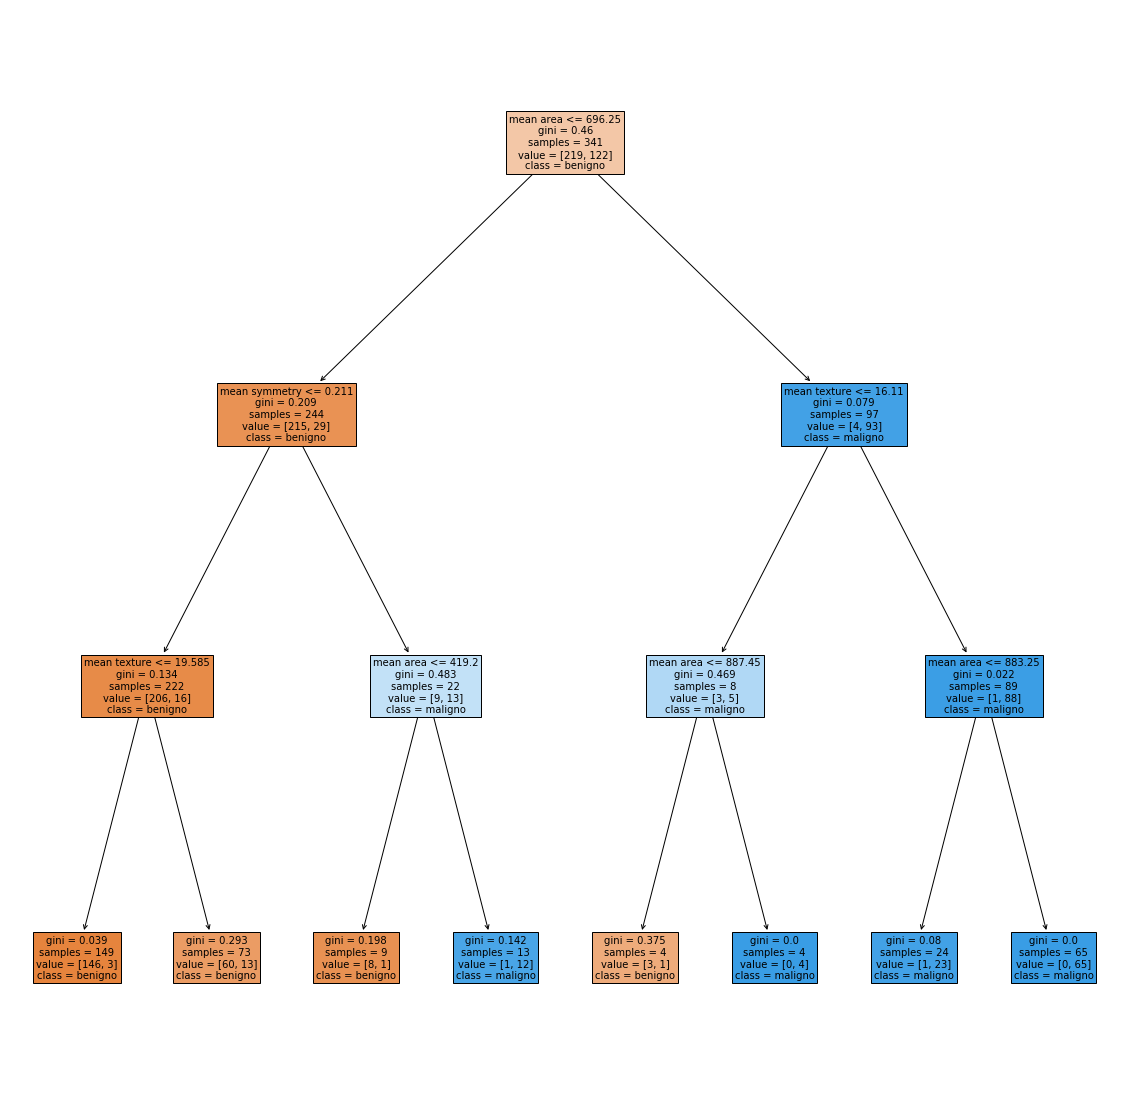

In [12]:
# Respuesta
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree

# Dividimos los datos en datos de entrenamiento (60%) i de test (40%) mediante la función train_test_split 
train,test = train_test_split(diagnostics_df, test_size=0.40)

# Creamos el clasificador 
dtree = DecisionTreeClassifier(max_depth=3)

# Entrenamos el clasificador
fit = dtree.fit(train[['mean area','mean symmetry', 'mean texture']],train[['Type']])

# Evaluamos la precisión del clasificador
score = dtree.score(test[['mean area','mean symmetry', 'mean texture']],test[['Type']])
print("El modelo tiene un " + str(np.around(score,2)*100) + '% de precisión en predecir el tipo de tumor.' )

# Mostramos el árbol de decisión y lo exportamos a un archivo PDF
fig = plt.figure(figsize=(20,20), facecolor='w')
tree.plot_tree(fit, filled=True, feature_names=['mean area','mean symmetry', 'mean texture'], class_names=['benigno','maligno']);
plt.savefig('tree.pdf')

#### Respuesta

Clasificaremos el tumor como beningno (correspondiente con la primera hoja del árbol) con una probabilidad de error (impureza de Gini) bastante baja.